In [224]:
#Importing the Fiftyone library for further usage
import fiftyone.zoo as foz
import fiftyone as fo
import fiftyone.utils.image as foui
import pandas as pd
import cv2
from PIL import Image
import random
import os
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [49]:
#Loading our training and validation dataset
dataset_train_val = foz.load_zoo_dataset("open-images-v7",
                               split= "train",
                              label_types=["detections", "classifications"],
                              max_samples= 30000,
                              seed = 51,
                              shuffle=True)

#Loading our testing datset
dataset_test = foz.load_zoo_dataset("open-images-v7",
                               split= "test",
                              label_types=["detections", "classifications"],
                              max_samples= 6000,
                              seed = 51,
                              shuffle=True)


Necessary images already downloaded
Existing download of split 'train' is sufficient
Loading existing dataset 'open-images-v7-train-30000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Necessary images already downloaded
Existing download of split 'test' is sufficient
Loading existing dataset 'open-images-v7-test-6000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [50]:
dataset_train_val.stats()

{'samples_count': 30000,
 'samples_bytes': 81065461,
 'samples_size': '77.3MB',
 'total_bytes': 81065461,
 'total_size': '77.3MB'}

In [51]:
len(dataset_train_val.default_classes)

601

In [52]:
dataset_train_val.load_annotations

<bound method SampleCollection.load_annotations of Name:        open-images-v7-train-30000
Media type:  image
Num samples: 30000
Persistent:  False
Tags:        []
Sample fields:
    id:              fiftyone.core.fields.ObjectIdField
    filepath:        fiftyone.core.fields.StringField
    tags:            fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:        fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    positive_labels: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classifications)
    negative_labels: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classifications)
    detections:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)>

In [53]:
dataset_test.stats()

{'samples_count': 6000,
 'samples_bytes': 15439524,
 'samples_size': '14.7MB',
 'total_bytes': 15439524,
 'total_size': '14.7MB'}

In [54]:
len(dataset_test.default_classes)

601

In [55]:
fo.launch_app(dataset_train_val)

Dataset:          open-images-v7-train-30000
Media type:       image
Num samples:      30000
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/

In [169]:
#Reading the annotations file with all the required data for the images
train_val_img_ann = pd.read_csv('C:/Users/islam/fiftyone/open-images-v7/train/labels/detections.csv', header =0)
train_val_img_ann

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0,0,0.317188,0.257812,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14610224,fffffdaec951185d,xclick,/m/0dzct,1,0.445625,0.672500,0.154784,0.200750,1,0,...,0,0,0.510000,0.445625,0.538125,0.672500,0.154784,0.168856,0.200750,0.176360
14610225,fffffdaec951185d,xclick,/m/0dzct,1,0.695625,0.786250,0.118199,0.297373,0,0,...,0,0,0.725000,0.748125,0.695625,0.786250,0.118199,0.297373,0.233583,0.207317
14610226,fffffdaec951185d,xclick,/m/0dzct,1,0.788750,0.835000,0.198874,0.272045,1,0,...,0,0,0.814375,0.814375,0.788750,0.835000,0.198874,0.272045,0.245779,0.247655
14610227,fffffdaec951185d,xclick,/m/0dzct,1,0.796875,0.951875,0.156660,0.205441,1,0,...,0,0,0.868750,0.796875,0.951875,0.942500,0.156660,0.176360,0.189493,0.205441


In [170]:
#Reading the labels names with the correspoding class for each one
train_val_img_clas = pd.read_csv('C:/Users/islam/fiftyone/open-images-v7/train/metadata/classes.csv', header =None,
                                names = ['LabelName','Class'])
train_val_img_clas

,LabelName,Class
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football
...,...,...
596,/m/0qmmr,Wheelchair
597,/m/0wdt60w,Rugby ball
598,/m/0xfy,Armadillo
599,/m/0xzly,Maracas


## Plot Bounding Box

In [206]:
#In here, we're building the function to take the image full path and the id of it 
#And start plotting the bounding boxes on each object with its corresponding class
#Based on the annotations and the image id on each file which is playing as our unique key to combine these datasets
def plot_box(img_name, img_id):
    img = Image.open(img_name)
    height, width = img.size
    print(f"Image: {img.size}")
    bboxs = train_val_img_ann[train_val_img_ann['ImageID'] == img_id]
    for index, row in bboxs.iterrows():
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        xmin = int(xmin*width)
        xmax = int(xmax*width)
        ymin = int(ymin*height)
        ymax = int(ymax*height)
        label_name = row['LabelName']
        class_series = train_val_img_clas[train_val_img_clas['LabelName'] == label_name]
        class_name = class_series['Class'].values[0]
        print(f"Coordinates: {xmin,xmax}, {ymin,ymax}")
        img_pix = np.array(img)
        cv2.rectangle(img_pix, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_pix, class_name, (xmin, ymin-10), font, 3, (0,255,0), 5)
    plt.figure(figsize=(15,10))
    plt.title("Image with Bounding Box")
    plt.imshow(img_pix)
    plt.axis("off")
    plt.show()
  #  return img_pix

In [216]:
#Taking a sample of the dataset to run the function on it
obj_labeled_sample = train_val_img_ann["ImageID"].value_counts().tail(50).index.values
#Our training dataset path
img_path = 'C:/Users/islam/fiftyone/open-images-v7/train/data/'
obj_labeled_sample

array(['7a21927e3d1b7502', '7a21e50c51508a3a', '7a2420cf90bda2ff', 'cecc4f01e1966030', 'cecc3e329eafed7e', '15790265843c89f6', '7a24e1b87f6362e4', 'cecc2a856f665606', '7a24fe3a79454c9f', '1578efa768de857e', '7a254d36b2951a3e', '7a257749c84458d7', '7a259973a03f3af0', '1578db09d4961d47', 'cecb82d4b55ecded',
       '7a263d039e0ca0aa', '7a2648a6bc306f03', '7a268614c3d92ae5', '7a2691f13d4428f0', '7a26978cb92e0d04', 'cecb4fa2a2bbb9b8', 'cecb4e96d967ecd0', '0516f71f618e0087', '7a279a7810fdb6af', '7a242e8b420344a2', '7a23bf23c0749c5a', 'cecde889a8f0a1b5', 'cecc72ea163f7732', '7a22011f53305064', '7a221b7299bfb572',
       'cecdca6df9dfb79b', '0516a66cba8401b2', '7a229fec0c172c43', 'cecd7a14f0bc0c6b', '7a22c1fb22c62eeb', '7a22c40d87d13f74', 'cecd655c211d9bde', '7a22d93067535f64', '7a22f8cc63b8ef9f', 'cecd40d1fd2fe74e', '0516b45abb07783b', '0516b83e6ca56225', '7a236976d301e4e4', '7a236f7c28b4dd81', 'ceccfff9025dddde',
       'cecce707ee8e3f47', '0516b96f324d3185', 'cecca3fd43dfd625', '7a23b9b5804

Image: (256, 256)
Coordinates: (0, 255), (151, 255)


<IPython.core.display.Javascript object>


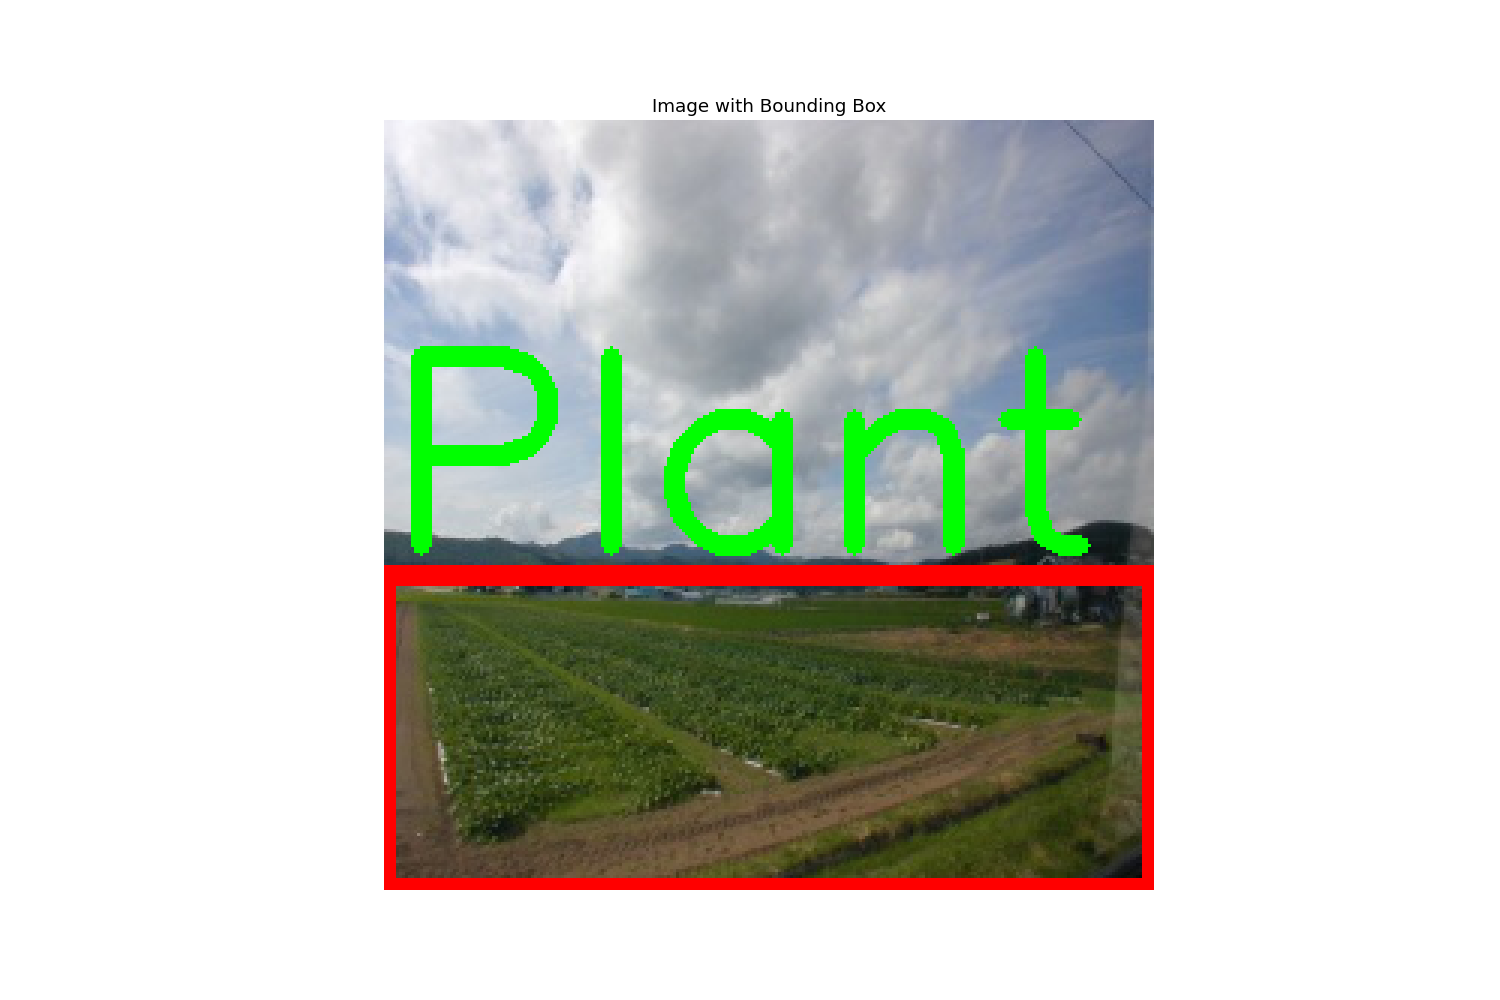

Image: (256, 256)
Coordinates: (201, 254), (26, 101)


<IPython.core.display.Javascript object>


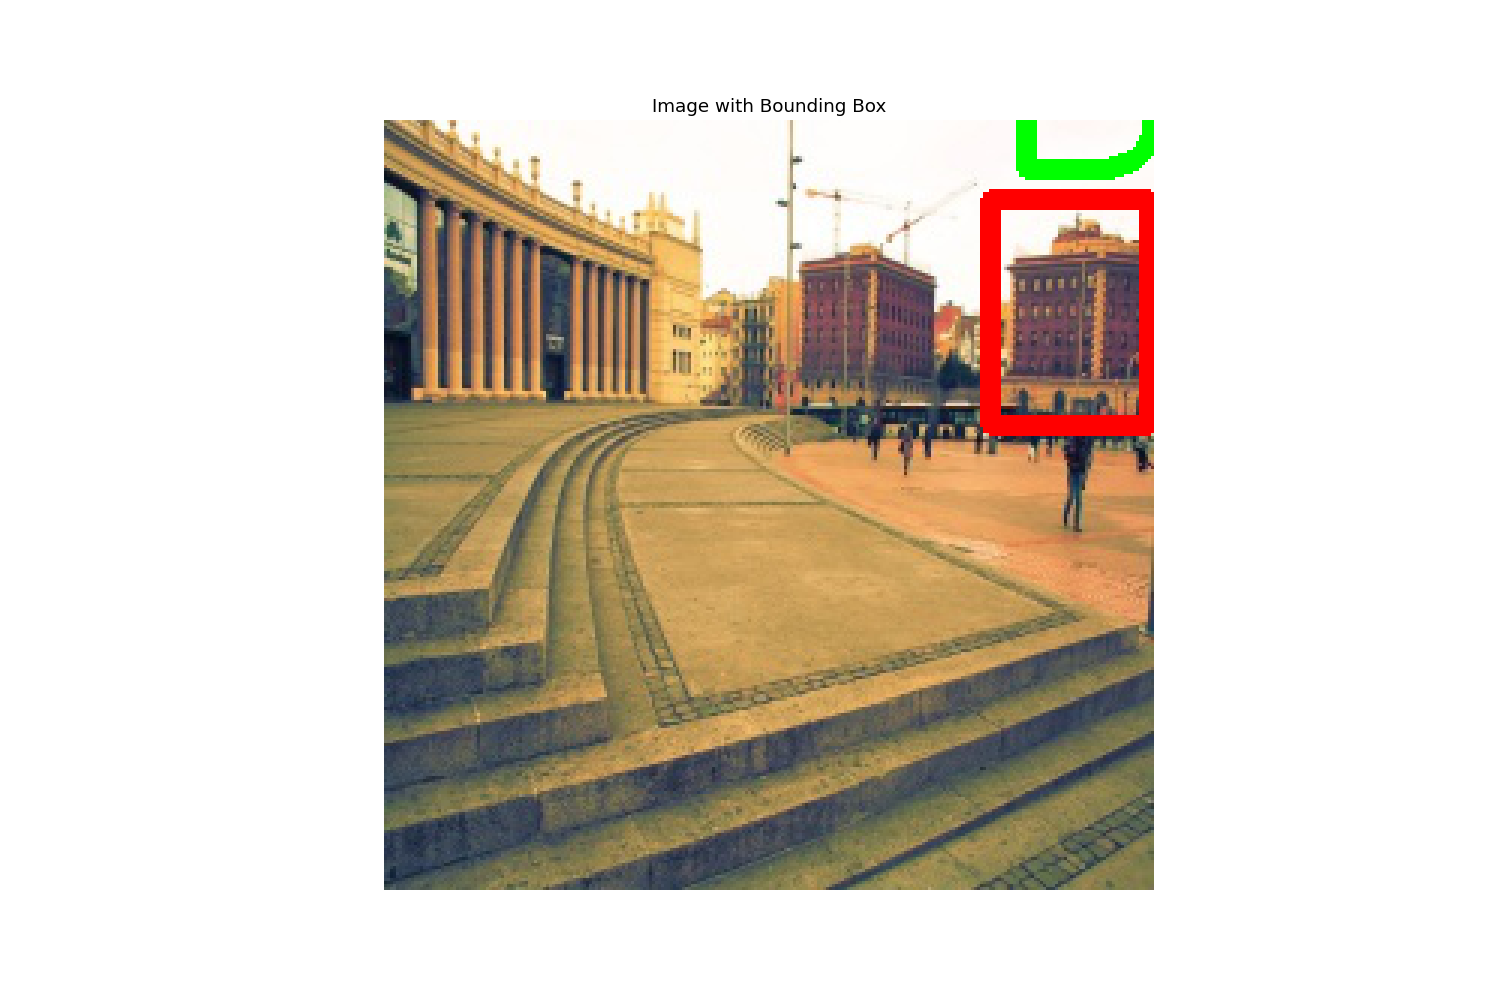

In [225]:
#Running our box plotting function over the sample and show some of the results
for img_id in random.sample(list(obj_labeled_sample), 40):
    img_name = os.path.join(img_path, train_val_img_ann.loc[train_val_img_ann['ImageID'] == img_id]['ImageID'].values[0]+'.jpg')
    if os.path.exists(img_name):
        plot_box(img_name, img_id)

## Our RCNN Code

In [284]:
#Getting the classes and their count
#Take into consideration that images may have several objects, therefore, the number of images != the number of objects
classes_count = {}
classes_label_names = {}
unique_classes = train_val_img_clas['Class'].unique()
for i in unique_classes:
    if True in (train_val_img_ann['LabelName'] == train_val_img_clas.loc[train_val_img_clas['Class'] == i, 'LabelName'].iloc[0]).unique():
        classes_count[i] = train_val_img_ann.loc[train_val_img_ann['LabelName'] == train_val_img_clas.loc[train_val_img_clas['Class'] == i, 'LabelName'].iloc[0]].groupby('LabelName').size().iloc[0]
classes_count

{'Tortoise': 1998,
 'Magpie': 145,
 'Sea turtle': 1132,
 'Football': 5097,
 'Ambulance': 447,
 'Ladder': 994,
 'Toothbrush': 219,
 'Syringe': 127,
 'Sink': 1648,
 'Toy': 70963,
 'Organ (Musical Instrument)': 398,
 'Cassette deck': 74,
 'Apple': 3898,
 'Human eye': 77233,
 'Cosmetics': 2394,
 'Paddle': 6951,
 'Snowman': 770,
 'Beer': 9565,
 'Chopsticks': 617,
 'Human beard': 3157,
 'Bird': 47921,
 'Parking meter': 209,
 'Traffic light': 7426,
 'Croissant': 447,
 'Cucumber': 1194,
 'Radish': 688,
 'Towel': 338,
 'Doll': 6442,
 'Skull': 2661,
 'Washing machine': 655,
 'Glove': 1198,
 'Tick': 143,
 'Belt': 422,
 'Sunglasses': 23996,
 'Banjo': 264,
 'Cart': 2755,
 'Ball': 6845,
 'Backpack': 1216,
 'Bicycle': 40161,
 'Home appliance': 2086,
 'Centipede': 280,
 'Boat': 79113,
 'Surfboard': 2594,
 'Boot': 3132,
 'Headphones': 1255,
 'Hot dog': 482,
 'Shorts': 16981,
 'Fast food': 24991,
 'Bus': 11927,
 'Boy': 87555,
 'Screwdriver': 85,
 'Bicycle wheel': 59521,
 'Barge': 983,
 'Laptop': 9327,
 

In [285]:
#Showing the results
for clas, count in classes_count.items():
    print(f"there're {count} {clas} in our training dataset")

there're 1998 Tortoise in our training dataset
there're 145 Magpie in our training dataset
there're 1132 Sea turtle in our training dataset
there're 5097 Football in our training dataset
there're 447 Ambulance in our training dataset
there're 994 Ladder in our training dataset
there're 219 Toothbrush in our training dataset
there're 127 Syringe in our training dataset
there're 1648 Sink in our training dataset
there're 70963 Toy in our training dataset
there're 398 Organ (Musical Instrument) in our training dataset
there're 74 Cassette deck in our training dataset
there're 3898 Apple in our training dataset
there're 77233 Human eye in our training dataset
there're 2394 Cosmetics in our training dataset
there're 6951 Paddle in our training dataset
there're 770 Snowman in our training dataset
there're 9565 Beer in our training dataset
there're 617 Chopsticks in our training dataset
there're 3157 Human beard in our training dataset
there're 47921 Bird in our training dataset
there're 209 

In [259]:
#All the classes we have in our dataset without duplications
train_val_img_clas['Class'].unique()

array(['Tortoise', 'Container', 'Magpie', 'Sea turtle', 'Football', 'Ambulance', 'Ladder', 'Toothbrush', 'Syringe', 'Sink', 'Toy', 'Organ (Musical Instrument)', 'Cassette deck', 'Apple', 'Human eye', 'Cosmetics', 'Paddle', 'Snowman', 'Beer', 'Chopsticks', 'Human beard', 'Bird', 'Parking meter', 'Traffic light',
       'Croissant', 'Cucumber', 'Radish', 'Towel', 'Doll', 'Skull', 'Washing machine', 'Glove', 'Tick', 'Belt', 'Sunglasses', 'Banjo', 'Cart', 'Ball', 'Backpack', 'Bicycle', 'Home appliance', 'Centipede', 'Boat', 'Surfboard', 'Boot', 'Headphones', 'Hot dog', 'Shorts', 'Fast food', 'Bus', 'Boy', 'Screwdriver',
       'Bicycle wheel', 'Barge', 'Laptop', 'Miniskirt', 'Drill (Tool)', 'Dress', 'Bear', 'Waffle', 'Pancake', 'Brown bear', 'Woodpecker', 'Blue jay', 'Pretzel', 'Bagel', 'Tower', 'Teapot', 'Person', 'Bow and arrow', 'Swimwear', 'Beehive', 'Brassiere', 'Bee', 'Bat (Animal)', 'Starfish', 'Popcorn', 'Burrito',
       'Chainsaw', 'Balloon', 'Wrench', 'Tent', 'Vehicle registrati